<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/deep_learning--keras/blob/master/Introduction_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow import keras
from tensorflow.keras import layers



Instantiating a convnet for MNIST digit classification

In [16]:
inputs = keras.Input(shape=(28,28,1))
x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu') (inputs)
x = keras.layers.MaxPool2D(pool_size=2) (x)
x = keras.layers.Conv2D(filters = 64, kernel_size=3,activation='relu') (x)
x = keras.layers.MaxPool2D(pool_size=2) (x)
x = keras.layers.Conv2D(filters = 128, kernel_size=3,activation='relu') (x)

x = layers.Flatten() (x)
outputs = keras.layers.Dense(10, activation='softmax') (x)
model = keras.Model(inputs=inputs,outputs = outputs)

Convnet takes in images of shape (height, width, num_channels) not including batch dimension

In [17]:
import tensorflow as tf
tf.config.list_physical_devices(


)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [19]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255.
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255.
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1576 - accuracy: 0.9509
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0456 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0188 - accuracy: 0.9942


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test accuracy is {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9929
test accuracy is 0.9929


we get a test accuracy of 99.28 % which is better than what we got in pixel wise dense neural network we got before.

Conv2D -> learn patterns with the help of filters looking at the inputs through a window of size (3X3 or 5X5 usually.)
Maxpool -> pick the max of 2X2 window of input and a stride of 2  thereby downsampling the input size to pick the relevant activations from the input also hierachical learning of patters

without maxpool -> there will be no spatial hierarchy , the subsequent filters will be looking at a very narrow window around input pixels and hence will not have a broad knowledge of spatial pattern around the inputs. Also, the number of parameters will be very big, leading to overfitting and computational overheads.

Maxpool for downsampling is better than strided convolution downsampling or average pooling because this works better. the reason could be that once dense feature map of input is obtained with the help of unstrided convolution, the maximal activations are then picked with the help of maxpooling getting the features which contribute more to the task at hand rather than diluting the presence of a maximal feature through average pooling or missing the dense sampling through the sparser strided convolution.

Attacking a computer vision problem -> usually one with not so large datasets , say in the order of few thousand samples
1.naive approach -> training a convnet from scratch - low accuracy [overfitting]
2. data augmentation -> reduce the overfitting and improvement in accuracy
3. pretrained model feature extraction -> better accuracy
4. fine-tune a pretrained model

In [21]:
#Download of data


from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhivyeshkanagavel","key":"0cb55f5064c20347bb0c41e18ca5f775"}'}

In [24]:

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:03<00:00, 254MB/s]
100% 812M/812M [00:03<00:00, 221MB/s]


In [26]:
!unzip -qq dogs-vs-cats.zip

In [27]:
!unzip -qq train.zip

In [28]:
import os, pathlib, shutil
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats-vs-dogs-small")



In [29]:
def make_subset(subset_name, start_index, end_index):
  for category in ("cat","dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copy(src=original_dir/fname, dst=dir/fname)



In [30]:
make_subset("train", 0,1000)
make_subset("val",1000,1500)
make_subset("test",1500,2500)


The convnet will be similar to the one built before. we start with a image shape of 180,180 (arbitrary choice) and then have alternate layers of conv2D with relu and maxpool2D and finally reach 7X7. two more layers of conv2D and maxpool2D are added to augment the capacity of the model and also to have a reasonable tensor size in the end to flatten() before dense. Num channels will increase from 32 to 256 [a common trend in convnets]

the images will have to pre-processed and shaped to 180X180 before feeding to the model.

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255) (inputs)
x = layers.Conv2D(filters = 32,activation='relu',kernel_size=3) (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters = 64,activation='relu',kernel_size=3) (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters = 128,activation='relu',kernel_size=3) (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters = 256,activation='relu',kernel_size=3) (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters = 256,activation='relu',kernel_size=3) (x)
x = layers.Flatten() (x)
outputs = layers.Dense(1, activation='sigmoid') (x)
model = keras.Model(inputs = inputs, outputs = outputs)


In [33]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [34]:

model.compile(loss="binary_crossentropy",
                      optimizer="rmsprop",
metrics=["accuracy"])

Data preprocessing:
Read jpeg files
Convert to floating point tensors
Reshape to required shape
Chunk them into batches

In [35]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(directory=new_base_dir / "train",image_size=(180,180,),batch_size=32)
val_data = image_dataset_from_directory(directory=new_base_dir / "val",image_size=(180,180),batch_size=32)
test_data = image_dataset_from_directory(directory=new_base_dir / "test", image_size=(180,180),batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


A small crash course on tensorflow's data library and its Dataset class

Dataset class has many APIs which makes many cumbersome processes very easy. it is an iterator which returns a batch of input images, labels and can be used in a for loop.
It also does some optimizations like asynchronous pre-fetching so that buffer can be stored in gpu cache to load right after a batch is processed

In [36]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000,16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)



In [37]:
for i, element in enumerate(dataset):
  print(element.shape)
  if i>=2:
    break

(16,)
(16,)
(16,)


In [38]:
batched_data = dataset.batch(32)
for i, element in enumerate(batched_data):
  print(element.shape)
  if i>=2:
    break


(32, 16)
(32, 16)
(32, 16)


other useful functions : shuffle(buffer_size) -> shuffles elements within the buffer
prefetch(buffer_size) -> prefetches elements of the size in the GPU memory
.map(callable) -> applies an arbitrary transformation to each element of the dataset (the function callable , which expects to take as input a single element yielded by the dataset.)

In [39]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x,(4,4)))
for i, element in enumerate(dataset):
  print(element.shape)
  if i>=1:
    break


(16,)
(16,)



Back to our dataset

In [40]:
for data_batch, labels_batch in train_data:
  print("Data shape: ", data_batch.shape)
  print("Labels shape : ", labels_batch.shape)
  break


Data shape:  (32, 180, 180, 3)
Labels shape :  (32,)


Fitting the data on the dataset.

In [41]:
callbacks= keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras", save_best_only=True,monitor="val_loss")

In [42]:
history = model.fit(
            train_data,
            epochs=30,
            validation_data=val_data,
            callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 119ms/step - loss: 0.7002 - accuracy: 0.5095 - val_loss: 1.3466 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 90ms/step - loss: 0.6967 - accuracy: 0.5345 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6937 - accuracy: 0.5420 - val_loss: 0.6706 - val_accuracy: 0.6190
Epoch 4/30
63/63 [==============================] - 5s 67ms/step - loss: 0.6935 - accuracy: 0.5780 - val_loss: 0.6837 - val_accuracy: 0.5400
Epoch 5/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6454 - accuracy: 0.6360 - val_loss: 0.6259 - val_accuracy: 0.6390
Epoch 6/30
63/63 [==============================] - 6s 90ms/step - loss: 0.6248 - accuracy: 0.6650 - val_loss: 0.6081 - val_accuracy: 0.6590
Epoch 7/30
63/63 [==============================] - 9s 128ms/step - loss: 0.5840 - accuracy: 0.6870 - val_loss: 0.7043 - val_accuracy: 0.6390
Epoch 8/3

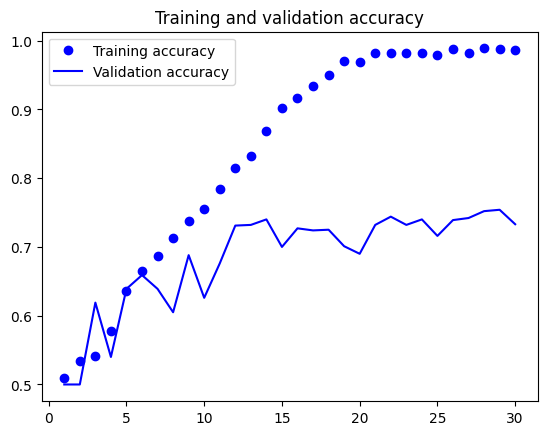

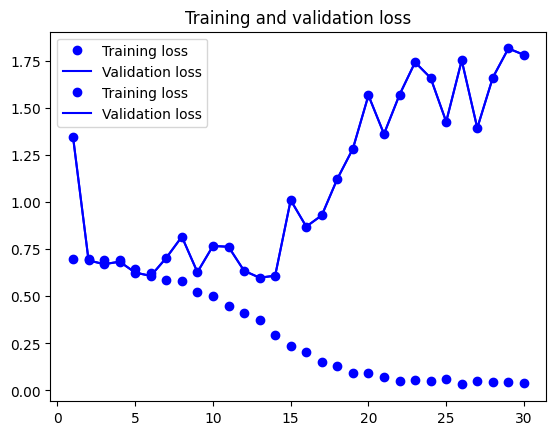

In [43]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [44]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_data)
print(f"test accuracy is {test_acc:.4f}")

63/63 [==============================] - 4s 55ms/step - loss: 0.5913 - accuracy: 0.7370
test accuracy is 0.7370


Data augmentation : keras Sequential API has a few options with which random transformations on the image like zoom, rotation, flip can be done which adds believable images to the dataset, thereby creating a richer diverse dataset and help curb overfitting

In [45]:
data_augmentation = keras.Sequential(
            [
               layers.RandomFlip("horizontal"),
               layers.RandomRotation(0.1),
               layers.RandomZoom(0.2),
] )

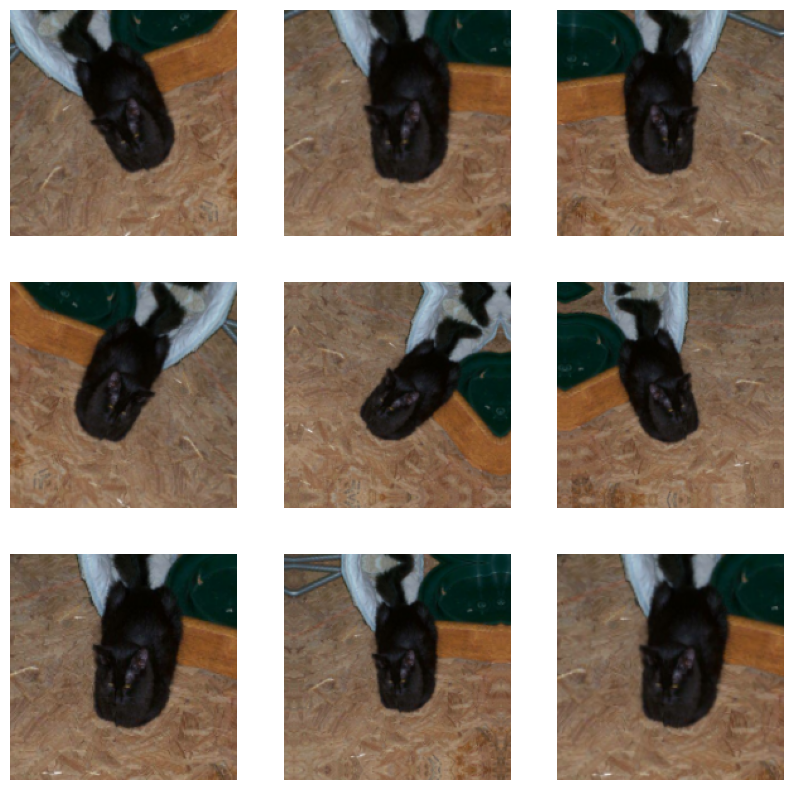

In [46]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

the data augmentation makes sure that the different variants of the training set images are fed to the model but still the inputs are not completely novel. they are subtle manipulations and transformations of the input images.
To further reduce overfitting, we use dropout where a random proportion of weights are not trained during training.
Both image augmentation and dropout are disabled during inference

 Defining a new convnet that includes image augmentation and dropou

In [47]:
inputs= keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255) (x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu') (x)
x = layers.MaxPooling2D(pool_size=(2,2)) (x)
x = layers.Conv2D(filters = 64, kernel_size=3, activation='relu') (x)
x = layers.MaxPooling2D(pool_size=(2,2)) (x)
x = layers.Conv2D(filters = 128, kernel_size=3, activation='relu') (x)
x = layers.MaxPooling2D(pool_size=(2,2)) (x)
x = layers.Conv2D(filters = 256, kernel_size=3, activation='relu') (x)
x = layers.MaxPooling2D(pool_size=(2,2)) (x)
x = layers.Conv2D(filters = 256, kernel_size=3, activation='relu') (x)
x = layers.Flatten() (x)
x = layers.Dropout(0.5) (x)
outputs = layers.Dense(1, activation='sigmoid') (x)
model = keras.Model(inputs= inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])




In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_data,
    epochs=65,
    validation_data=val_data,
    callbacks=callbacks)

Epoch 1/65
63/63 [==============================] - 10s 96ms/step - loss: 0.7008 - accuracy: 0.5125 - val_loss: 0.6921 - val_accuracy: 0.5420
Epoch 2/65
63/63 [==============================] - 4s 61ms/step - loss: 0.6985 - accuracy: 0.5125 - val_loss: 0.6921 - val_accuracy: 0.5060
Epoch 3/65
63/63 [==============================] - 4s 59ms/step - loss: 0.6935 - accuracy: 0.5435 - val_loss: 0.6868 - val_accuracy: 0.5280
Epoch 4/65
63/63 [==============================] - 6s 99ms/step - loss: 0.6797 - accuracy: 0.5755 - val_loss: 0.6847 - val_accuracy: 0.5590
Epoch 5/65
63/63 [==============================] - 4s 61ms/step - loss: 0.6734 - accuracy: 0.5890 - val_loss: 0.6792 - val_accuracy: 0.5530
Epoch 6/65
63/63 [==============================] - 4s 59ms/step - loss: 0.6451 - accuracy: 0.6290 - val_loss: 0.6419 - val_accuracy: 0.6270
Epoch 7/65
63/63 [==============================] - 6s 91ms/step - loss: 0.6536 - accuracy: 0.6295 - val_loss: 0.6659 - val_accuracy: 0.6010
Epoch 8/65
6

In [49]:
test_model = keras.models.load_model(
            "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")


63/63 [==============================] - 4s 53ms/step - loss: 0.4540 - accuracy: 0.8235
Test accuracy: 0.823


With this approach, the validation accuracy has increased to  80  from around 60 percent on a base model. With this approach, this cannot be increased to a good percent.
Pretrained model can be leveraged to reduce the train runtime and increase the accuracy, because the pre-trained model would have been trained on a large dataset with a solid architecture.

We ll use a pretrained convnet trained on imagenet dataset. For this example we use the vgg16 model [though this is older and is heavier compared to state of the art]

Two ways of using pre-trained nets : feature extraction and fine-tuning

Convolutional models have two components - 1. Convolutional base (Conv2D+MaxPool) and the densely connected layer in the end.

Feature extraction : taking the base of the covolutional base - because the convolution base learns generic concepts in the images like Imagenet dataset. but the dense layer in the end learns concepts specific to the dataset you have in the hand. So, the conv base is taken, a dense layer is added and then trained on the current dataset.

For applications where object location matters, the densely conntected layers dont matter.


The generality of the concepts learned from the images differs from layer to layer depending on the depth of the model. The first few layers learn more generic ideas like lines, color gradients, textures etc , whereas next layers learn more abstract features like eyes, face, whiskers etc.
So, if the dataset differs largely from the base dataset like ImageNet, we would be better off keeping the first few layers frozen and retraining the other layers.

Keras contains many models pre-packages in keras.applications module i.e EfficientNet, Resnet, VGG16,Xception, Densenet etc

In [50]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False,input_shape=(180,180,3))

58889256/58889256 [==============================] - 0s 0us/step


In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

There are two possible approaches.
pass the images to the conv_base model and store the result as numpy arrays to the disk and then train these results onto a densely connected layer. this is a faster way of doing it
there is another way of doing where we freeze the conv base layer,but pass the image to the entire model end to end.
Train the entire pipeline along with image augmentation.
This is slower but since data augmentation is added, it gives more accuracy.

In [52]:
import numpy as np
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images,labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)





In [53]:
train_features, train_labels = get_features_and_labels(train_data)
val_features, val_labels = get_features_and_labels(val_data)
test_features, test_labels = get_features_and_labels(test_data)

1/1 [==============================] - 0s 36ms/step


In [55]:
train_features.shape, val_features.shape, test_features.shape


((2000, 5, 5, 512), (1000, 5, 5, 512), (2000, 5, 5, 512))

In [56]:
train_labels.shape

(2000,)

In [57]:
train_labels[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int32)

Now a densely connected layer is added on top of this features to get final result

In [58]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten() (inputs)
x = layers.Dense(256) (x)
x = layers.Dropout(0.5) (x)
outputs = layers.Dense(1, activation='sigmoid') (x)
model = keras.Model(inputs=inputs, outputs = outputs)


In [59]:
model.compile(loss="binary_crossentropy",
                      optimizer="rmsprop",
                      metrics=["accuracy"])


In [60]:
callbacks = [
            keras.callbacks.ModelCheckpoint(
                filepath="feature_extraction.keras",
                save_best_only=True,
                monitor="val_loss")
       ]

In [61]:
history = model.fit(
            train_features, train_labels,
            epochs=20,
            validation_data=(val_features, val_labels),
            callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 19.3119 - accuracy: 0.9265 - val_loss: 9.9246 - val_accuracy: 0.9490
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 4.3677 - accuracy: 0.9690 - val_loss: 4.4869 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 1.2417 - accuracy: 0.9900 - val_loss: 3.7453 - val_accuracy: 0.9740
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5514 - accuracy: 0.9870 - val_loss: 5.2484 - val_accuracy: 0.9660
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 0.4066 - accuracy: 0.9955 - val_loss: 17.5136 - val_accuracy: 0.9380
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 1.6791 - accuracy: 0.9880 - val_loss: 6.7926 - val_accuracy: 0.9660
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0168 - accuracy: 0.9935 - val_loss: 5.3818 - val_accuracy: 0.9680
Epoch 8/20


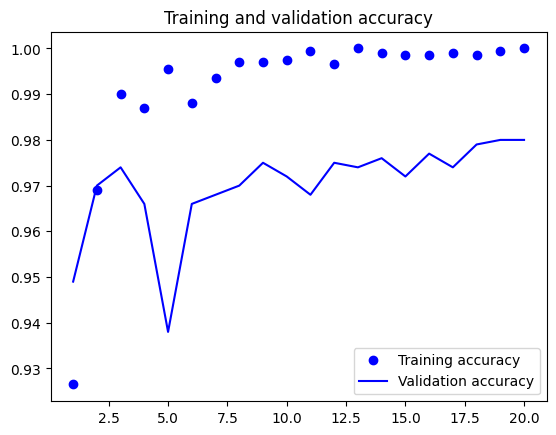

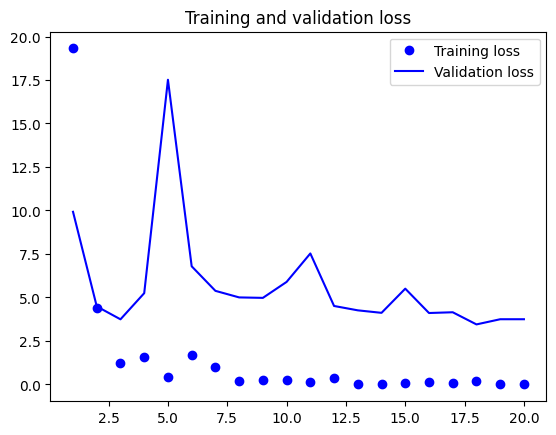

In [64]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

The Validation accuracy seems to have touched 97 percent which is much higher than the 82 we got before with naive convnet model.
But the model still seems to overfit right from the second epoch or so, maybe because of the small dataset and powerful base model used. to avoid overfitting, we can try image augmentation on the feature augmentation process.


In [67]:
test_model = keras.models.load_model(
            "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 6ms/step - loss: 6.5134 - accuracy: 0.9725
Test accuracy: 0.973


on the dataset , we get an accuracy of 97.25 percent which is not bad.let us see if with image augmentation, it can be increased.

Feature extraction with data augmentation
The conv_base is not trainable , only the densely connected layers are trainable.if conv_base is set trainable, the gradients coming from randomly initialized densely connected layer will distort the conv_base weights.

In [69]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False # the weights of the base are set non-trainable

In [70]:
#just for finding the number of params, printing the conv_base params with and without freezing
conv_base.trainable = True
print("the conv_base trainable parameters before freezing : ", len(conv_base.trainable_weights))
conv_base.trainable = False
print("the conv_base trainable parameters after freezing : ", len(conv_base.trainable_weights))

the conv_base trainable parameters before freezing :  26
the conv_base trainable parameters after freezing :  0


now three modules are chained together - Data augmentation, Conv_base and the dense classifier

In [71]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
] )

In [81]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [82]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_2  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_7 (Flatten)         (None, 12800)             0   

only two layers added will be trainable and others will be non-trainable.

In [83]:
print(len(model.trainable_weights))

4


In [85]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5", # .keras throws an error - not serializable, hence saving in .h5
        save_best_only=True,
        monitor="val_loss")
]

In [86]:
history = model.fit(
            train_data,
            epochs=50,
            validation_data=val_data,
            callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 5.2044 - accuracy: 0.9495

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 9s 143ms/step - loss: 5.2044 - accuracy: 0.9495 - val_loss: 4.6722 - val_accuracy: 0.9700
Epoch 2/50
63/63 [==============================] - 10s 144ms/step - loss: 5.5717 - accuracy: 0.9600 - val_loss: 3.9683 - val_accuracy: 0.9760
Epoch 3/50
63/63 [==============================] - 12s 181ms/step - loss: 4.0493 - accuracy: 0.9620 - val_loss: 6.2650 - val_accuracy: 0.9660
Epoch 4/50
63/63 [==============================] - 10s 145ms/step - loss: 3.3368 - accuracy: 0.9655 - val_loss: 7.2957 - val_accuracy: 0.9640
Epoch 5/50
63/63 [==============================] - 11s 172ms/step - loss: 3.9346 - accuracy: 0.9655 - val_loss: 5.7781 - val_accuracy: 0.9650
Epoch 6/50
63/63 [==============================] - 9s 146ms/step - loss: 2.9177 - accuracy: 0.9715 - val_loss: 2.7775 - val_accuracy: 0.9780
Epoch 7/50
63/63 [==============================] - 10s 146ms/step - loss: 2.6358 - accuracy: 0.9750 - val_loss: 5.2724 - val_accuracy: 0.9630
Epoch 8/50
6

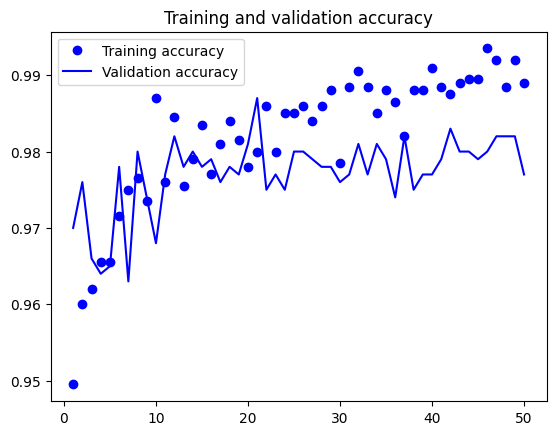

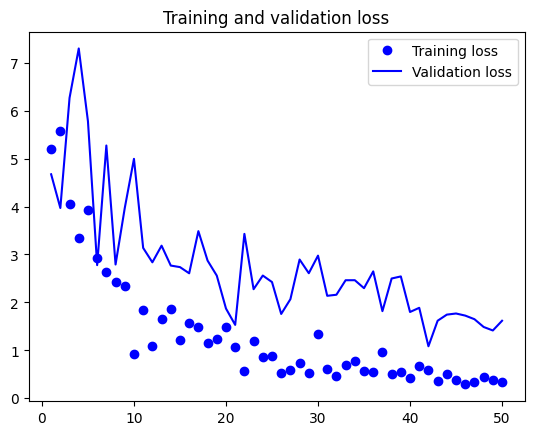

In [87]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [88]:
test_model = keras.models.load_model(
            "feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 87ms/step - loss: 2.1778 - accuracy: 0.9740
Test accuracy: 0.974


though validation accuracy is very high .On test set, this may not translate. Some samples are simply difficult and the results depend on the samples present in the st



test accuracy is around 97.5 percent which is actually cool!

The next approach is to fine tune the model. meaning the last few layers of the conv_base are retrained.[the last block to be precise]

The approach is called finetuning because the abstract concepts learned in the top few layers are overwritten with abstract concepts relevant for this dataset along with dense connceted layers appended to the conv_base

finetuning steps:
Add a densely connected classifier layer on top of conv_base.
Train the classifier .
Then unfreeze the top of the conv_base and train them along with classifier [do not unfreezet the batch norm layer]
The reason for first training the classifier and then conv_base top is because if this is not done,the error propagating from the randomly initialized will be big and distort the conv_base tops

In [89]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

the block 5 layers will not be frozen and they will be trained along with classifier layer.

The reason for not finetuning the earlier layers is that:
The earlier layers enocode generic features and the top layers encode task specific features. Disturbing the generic feature encoding layers will lead to diminishing returns.
also, if we train the conv net fromscratch, it leads to overfitting the dataset since it is a small dataset.
Also, training time and computational powers are simply wasted.
usage of pretrained model is always encouraged to save on compute and time.

In [90]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [91]:
len(model.trainable_weights)

10

Earlier the number of trainable weight in the model was 4, but now it is 10 because the last three conv layers are also included for training. The model object has already been trained on the train_data with image augmentation. Now the new model with last three conv layers unfrozen is trained with very low learning rata = 1e-5. the model has to compiled again to include the changes i.e last three layers of conv_base being trainable now

In [92]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [93]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [94]:
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.3489 - accuracy: 0.9915

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 15s 175ms/step - loss: 0.3489 - accuracy: 0.9915 - val_loss: 1.6788 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 10s 149ms/step - loss: 0.2401 - accuracy: 0.9920 - val_loss: 1.9790 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 11s 167ms/step - loss: 0.3935 - accuracy: 0.9910 - val_loss: 1.6409 - val_accuracy: 0.9780
Epoch 4/30
63/63 [==============================] - 11s 173ms/step - loss: 0.5134 - accuracy: 0.9910 - val_loss: 1.5684 - val_accuracy: 0.9780
Epoch 5/30
63/63 [==============================] - 10s 160ms/step - loss: 0.3966 - accuracy: 0.9905 - val_loss: 1.4994 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 12s 187ms/step - loss: 0.2893 - accuracy: 0.9910 - val_loss: 1.6581 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 12s 180ms/step - loss: 0.2951 - accuracy: 0.9920 - val_loss: 1.2916 - val_accuracy: 0.9800
Epoch 8/30

In [95]:
test_model = keras.models.load_model(
            "fine_tuning.h5")
test_loss, test_acc = test_model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 84ms/step - loss: 1.7899 - accuracy: 0.9760
Test accuracy: 0.976


With finetuning, the accuracy is 97.6 percent which is an improvement

So,the basic computer vision deep learning workflow is to have a convnet from scratch,  then put data augmentation and check for increase in accuracy [this solves overfitting with dropout],  if possible always check if a pretrained network is available trained on similar datasets, take that and finetune with image augmentation.